<a href="https://colab.research.google.com/github/snehalramteke27/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title:- Cardiovascular Risk Prediction**

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

# **Data Description**
# Demographic:
• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)

# Behavioral
• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

# Medical( history)
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

# Medical(current)
• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)
Predict variable (desired target)

**• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV**

# **Importing Libraries and Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.feature_selection import chi2
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [ ]:
from prettytable import PrettyTable

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set()

# **Data Loading**

In [ ]:
# Mount Drive to load data.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the csv file
df=pd.read_csv('/content/drive/MyDrive/Cardiovascular Risk Prediction/data_cardiovascular_risk.csv')


# **Understand the Data:**

In [ ]:
# Check 1st Five rows
df.head()

,id,age,education,sex,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,bmi,heart_rate,glucose,ten_year_chd,pulse_pressure
0,0.0,1.812913,2,0,0.602060,0,0,0,0,2.346353,1.421275,1.959041,1.908485,1,1.806180
1,1.0,1.568202,4,1,0.000000,0,0,1,0,2.328380,1.488127,1.863323,1.880814,0,1.851258
2,2.0,1.672098,1,0,1.041393,0,0,0,0,2.399674,1.329398,1.949390,1.977724,0,1.662758
3,3.0,1.707570,1,1,1.322219,0,0,1,0,2.369216,1.466274,1.838849,1.977724,1,1.851258
4,4.0,1.812913,1,0,1.491362,0,0,0,0,2.383815,1.438067,1.851258,1.892095,0,1.720159


In [ ]:
# Check last 5 rows
df.tail(5)

,id,age,education,sex,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,bmi,heart_rate,glucose,ten_year_chd,pulse_pressure
3385,3385.0,1.785330,1,0,0.00000,0,0,0,0,2.418301,1.481156,1.851258,2.017033,0,1.658011
3386,3386.0,1.672098,1,0,0.00000,0,0,0,0,2.301030,1.360972,1.908485,1.929419,0,1.672098
3387,3387.0,1.653213,3,1,0.60206,0,0,1,0,2.547775,1.475962,1.869232,1.863323,1,1.662758
3388,3388.0,1.785330,1,1,0.00000,0,0,1,0,2.283301,1.380392,1.908485,1.934498,0,1.799341
3389,3389.0,1.740363,3,0,0.00000,0,0,0,0,2.460898,1.489677,1.903090,1.968483,0,1.681241


In [ ]:
#Getting the shape of dataset with rows and columns
df.shape

(3390, 15)

In [ ]:
# Check the info of dataset to know the data types of columns or variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3390 non-null   float64
 1   age                3390 non-null   float64
 2   education          3390 non-null   int64  
 3   sex                3390 non-null   int64  
 4   cigs_per_day       3390 non-null   float64
 5   bp_meds            3390 non-null   int64  
 6   prevalent_stroke   3390 non-null   int64  
 7   prevalent_hyp      3390 non-null   int64  
 8   diabetes           3390 non-null   int64  
 9   total_cholesterol  3390 non-null   float64
 10  bmi                3390 non-null   float64
 11  heart_rate         3390 non-null   float64
 12  glucose            3390 non-null   float64
 13  ten_year_chd       3390 non-null   int64  
 14  pulse_pressure     3390 non-null   float64
dtypes: float64(8), int64(7)
memory usage: 397.4 KB


In [ ]:
#Looking for the description of the dataset to get insights of the data
df.describe(include='all' )

,id,age,education,sex,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,bmi,heart_rate,glucose,ten_year_chd,pulse_pressure
count,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,1694.500000,1.697364,1.946018,0.432743,0.597814,0.029499,0.006490,0.315339,0.025664,2.369155,1.423200,1.881269,1.909285,0.150737,1.688451
std,978.753033,0.074053,1.017568,0.495529,0.638556,0.169224,0.080309,0.464719,0.158153,0.080585,0.064120,0.066227,0.085669,0.357846,0.118444
min,0.000000,1.518514,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.033424,1.229426,1.662758,1.612784,0.000000,1.204120
25%,847.250000,1.633468,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.315970,1.380754,1.838849,1.863323,0.000000,1.612784
50%,1694.500000,1.698970,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.371068,1.421275,1.880814,1.897902,0.000000,1.681241
75%,2541.750000,1.755875,3.000000,1.000000,1.322219,0.000000,0.000000,1.000000,0.000000,2.423246,1.462361,1.924279,1.939519,0.000000,1.755875
max,3389.000000,1.851258,4.000000,1.000000,1.851258,1.000000,1.000000,1.000000,1.000000,2.843233,1.761928,2.158362,2.596597,1.000000,2.206826


Checking min and max, All data points are in valid range.

**Duplicate Value**

In [ ]:
# Checking Duplicate Values

print(len(df[df.duplicated()]))

0


* The dataset is from an ongoing cardiovascular study on residents of the town 
of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).
* The dataset provides the patients’ information. Each attribute is a potential risk factor. There are demographic, behavioral, and medical risk factors.
* **The dataset contains 3390 rows and 16 columns. There are no duplicate records.**

# **Data Cleaning**

In [ ]:
#Since the variables having units with name, renaming columns for better variable analysis.
df.rename(columns={'cigsPerDay':'cigs_per_day','BPMeds':'bp_meds',
                   'prevalentStroke':'prevalent_stroke','prevalentHyp':'prevalent_hyp',
                   'totChol':'total_cholesterol','sysBP':'systolic_bp','diaBP':'diastolic_bp',
                   'BMI':'bmi','heartRate':'heart_rate','TenYearCHD':'ten_year_chd'},
          inplace = True)

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigs_per_day',
       'bp_meds', 'prevalent_stroke', 'prevalent_hyp', 'diabetes',
       'total_cholesterol', 'systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate',
       'glucose', 'ten_year_chd'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

,id,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("Unique values in",i,":",df[i].nunique())

Unique values in id : 3390
Unique values in age : 39
Unique values in education : 4
Unique values in sex : 2
Unique values in is_smoking : 2
Unique values in cigs_per_day : 32
Unique values in bp_meds : 2
Unique values in prevalent_stroke : 2
Unique values in prevalent_hyp : 2
Unique values in diabetes : 2
Unique values in total_cholesterol : 240
Unique values in systolic_bp : 226
Unique values in diastolic_bp : 142
Unique values in bmi : 1259
Unique values in heart_rate : 68
Unique values in glucose : 132
Unique values in ten_year_chd : 2


In [ ]:
# Defining 3 lists containing the column names of 
# a. dependent variables
# b. continuous independent variables
# c. categorical independent variables
# This is defined based on the number of unique values for each attribute

dependent_var = ['ten_year_chd']
continuous_var = ['age','cigs_per_day','total_cholesterol','systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose']
categorical_var = ['education', 'sex', 'is_smoking','bp_meds','prevalent_stroke', 'prevalent_hyp', 'diabetes']

In [ ]:
# Encoding the binary columns

df['sex'] = np.where(df['sex'] == 'M',1,0)
df['is_smoking'] = np.where(df['is_smoking'] == 'YES',1,0)

#**Handling missing data**

In [ ]:
# checking for null values
df.isna().sum()

id                     0
age                    0
education             87
sex                    0
is_smoking             0
cigs_per_day          22
bp_meds               44
prevalent_stroke       0
prevalent_hyp          0
diabetes               0
total_cholesterol     38
systolic_bp            0
diastolic_bp           0
bmi                   14
heart_rate             1
glucose              304
ten_year_chd           0
dtype: int64

In [ ]:
# total null values
df.isna().sum().sum()

510

**There are a total of 510 missing values in the dataset.**

#Replacing the missing values in the categorical columns with the most frequent entry:

In [ ]:
# Replacing the missing values in the categorical columns with its mode
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['bp_meds'] = df['bp_meds'].fillna(df['bp_meds'].mode()[0])

In [ ]:

# education distribution after mode imputation
df.education.value_counts()

1.0    1478
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

In [ ]:
# bp_meds distribution after mode imputation
df.bp_meds.value_counts()

0.0    3290
1.0     100
Name: bp_meds, dtype: int64

# cigs_per_day:

In [ ]:
# Mean and median number of cigarettes per day
df.cigs_per_day.mean().round(0),df.cigs_per_day.median()

(9.0, 0.0)

Let's check the mean and median number of cigarettes smoked by patients, who reported that they smoke.

In [ ]:
# mean and median number of cigarettes per day for a smoker (excluding non-smokers)
df[df['is_smoking']==1]['cigs_per_day'].mean(),df[df['is_smoking']==1]['cigs_per_day'].median()

(18.345945945945946, 20.0)

* Mean number of cigarettes for a smoker = 18.34
* Median number of cigarettes for a smoker = 20

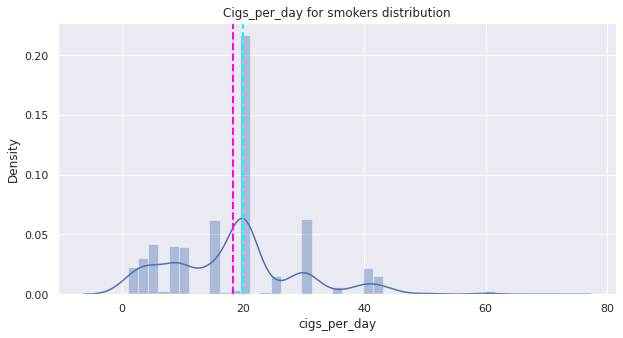

In [ ]:
# distribution of number of cigarettes per day for smokers (excluding non-smokers)
plt.figure(figsize=(10,5))
sns.distplot(df[df['is_smoking']==1]['cigs_per_day'])
plt.axvline(df[df['is_smoking']==1]['cigs_per_day'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df[df['is_smoking']==1]['cigs_per_day'].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.title('Cigs_per_day for smokers distribution')
plt.show()

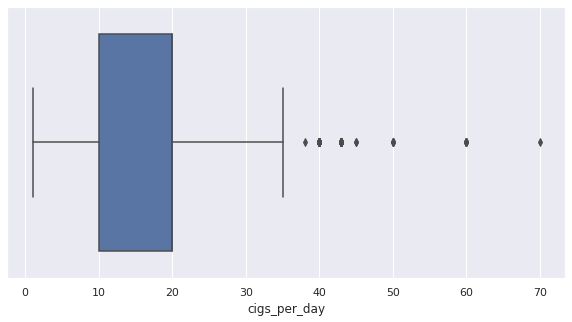

In [ ]:
# box plot for the number of cigarettes per day for smokers (excluding non-smokers)
plt.figure(figsize=(10,5))
sns.boxplot(df[df['is_smoking']==1]['cigs_per_day'])

**Since the number of cigarettes smoked by the patients who smoke contains outliers, the missing values in ths cigs_per_day column can be imputed with its median value.**

In [ ]:
# Imputing the missing values in the cigs_per_day 
df['cigs_per_day'] = df['cigs_per_day'].fillna(df[df['is_smoking']==1]['cigs_per_day'].median())

In [ ]:
# Checking for any wrong entries where the patient is not a smoker
# and cigarettes per day above 0

df[(df['is_smoking']==0) & (df['cigs_per_day']>0)]

,id,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd


In [ ]:
# Checking for any wrong entries where the patient is a smoker
# and cigarettes per day is 0

df[(df['is_smoking']==1) & (df['cigs_per_day']==0)]

,id,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd


# total_cholestrol, bmi, heart_rate:

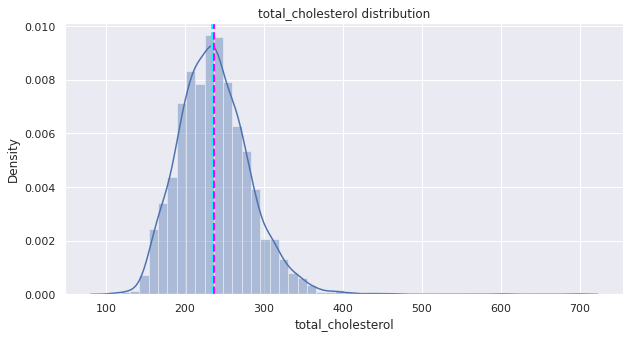

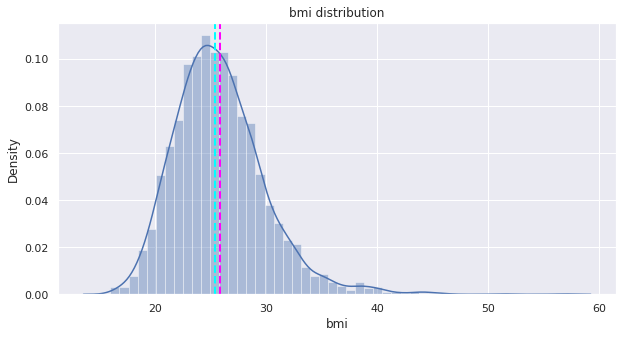

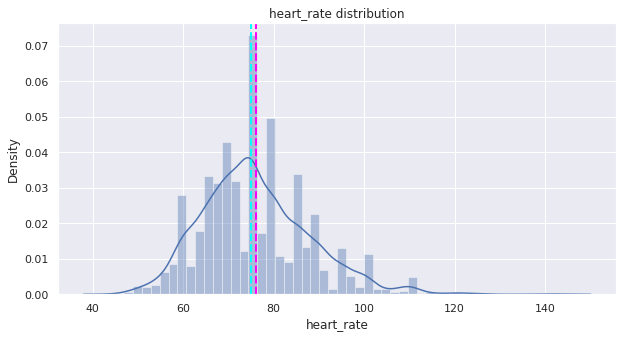

In [ ]:
# Checking the distribution of the total_cholesterol, bmi, and heart_rate
for i in ['total_cholesterol','bmi','heart_rate']:
  plt.figure(figsize=(10,5))
  sns.distplot(df[i])
  plt.axvline(df[i].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[i].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(i+' distribution')
  plt.show()

The total_cholestrol, bmi, and heart_rate columns are positively skewed

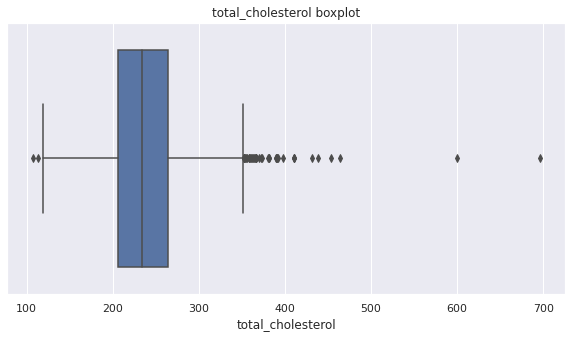

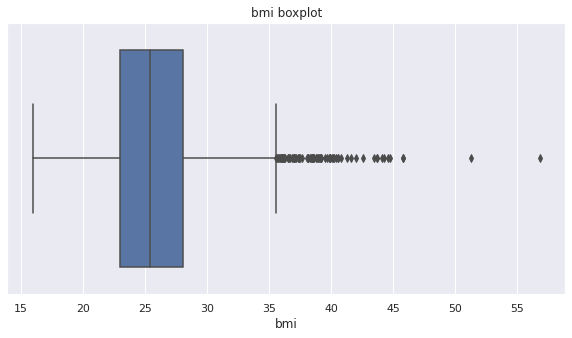

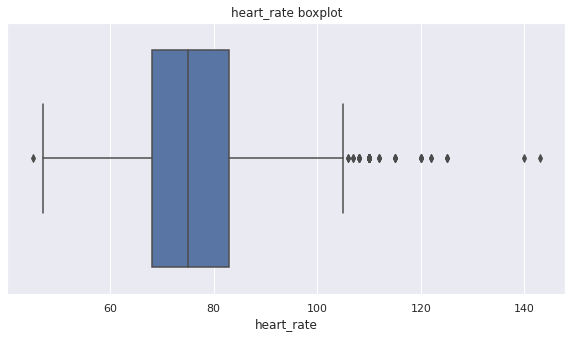

In [ ]:
# Checking outliers in total_cholesterol, bmi, heart_rate columns
for i in ['total_cholesterol','bmi','heart_rate']:
  plt.figure(figsize=(10,5))
  sns.boxplot(df[i])
  plt.title(i+' boxplot')
  plt.show()

The total_cholestrol, bmi, and heart_rate columns contain outliers.

In [ ]:
# Mean and median for total_cholesterol
df.total_cholesterol.mean(),df.total_cholesterol.median()

(237.07428400954655, 234.0)

In [ ]:
 #Mean and median for bmi
df.bmi.mean(),df.bmi.median()

(25.7949644549763, 25.38)

In [ ]:
# Mean and median for heart_rate
df.heart_rate.mean(),df.heart_rate.median()

(75.97727943346119, 75.0)

Since the total_cholestrol, bmi, and heart_rate columns are positively skewed, and also contains outliers. We can impute the missing values with its median.

In [ ]:
# Imputing missing values in the total_cholesterol, bmi, and heart_rate with their medain values
df['total_cholesterol'] = df['total_cholesterol'].fillna(df['total_cholesterol'].median())
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df['heart_rate'] = df['heart_rate'].fillna(df['heart_rate'].median())

In [ ]:
# mean and median of total_cholesterol after median imputation
df.total_cholesterol.mean(),df.total_cholesterol.median()

(237.03982300884957, 234.0)

In [ ]:
# mean and median of bmi after median imputation
df.bmi.mean(),df.bmi.median()

(25.793250737463126, 25.38)

In [ ]:
# mean and median of heart_rate after median imputation
df.heart_rate.mean(),df.heart_rate.median()

(75.97699115044247, 75.0)

#glucose:

In [ ]:
# total missing values in glucose
df.glucose.isna().sum()

304

The glucose column contains 304 missing values.

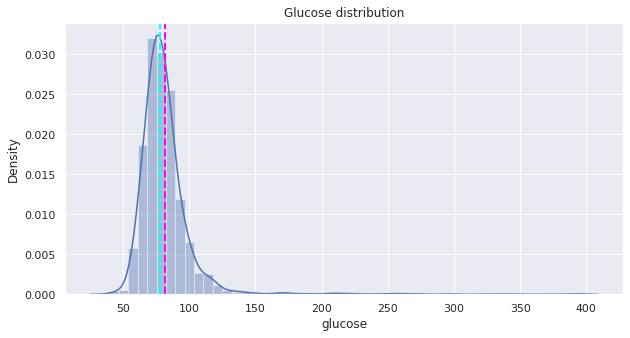

In [ ]:
# distribution of glucose
plt.figure(figsize=(10,5))
sns.distplot(df['glucose'])
plt.axvline(df['glucose'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df['glucose'].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.title('Glucose distribution')
plt.show()

The glucose column is positively skewed.

Text(0.5, 1.0, 'Glucose boxplot')

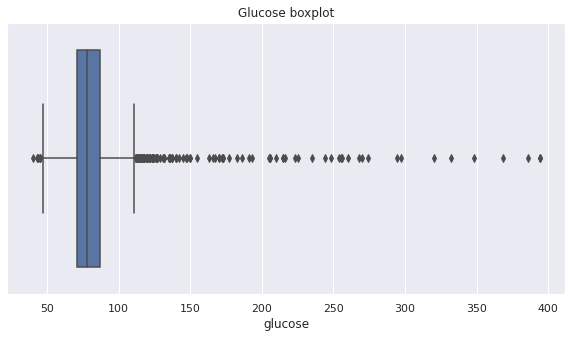

In [ ]:
# Outliers in glucose
plt.figure(figsize=(10,5))
sns.boxplot(df['glucose'])
plt.title('Glucose boxplot')

The glucose column contains outliers.

In [ ]:
# Mean, median, and mode for glucose
df.glucose.mean(),df.glucose.median(),df.glucose.mode()

(82.08651976668827, 78.0, 0    75.0
 dtype: float64)

* The distribution is positively skewed, with outliers.
* There are 304 missing values in the glucose column. If we choose to impute them with a single value of mean / median, we will be adding high bias at that point.
* To avoid this we can impute the missing values using KNN imputer.
If the dataset in question had been a time series, we could have used the interpolation method to impute the missing values.

In [ ]:
# Using KNN imputer with K=10
imputer = KNNImputer(n_neighbors=10)
imputed = imputer.fit_transform(df)
df = pd.DataFrame(imputed, columns=df.columns)

In [ ]:
 #mean, median, and mode for glucose after knn imputation
df.glucose.mean(),df.glucose.median(),df.glucose.mode()

(82.07203539823007, 78.05, 0    75.0
 dtype: float64)

After KNN imputation, there is no massive change in the values of mean. And the values of median and mode remain the same.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3390 non-null   float64
 1   age                3390 non-null   float64
 2   education          3390 non-null   float64
 3   sex                3390 non-null   float64
 4   is_smoking         3390 non-null   float64
 5   cigs_per_day       3390 non-null   float64
 6   bp_meds            3390 non-null   float64
 7   prevalent_stroke   3390 non-null   float64
 8   prevalent_hyp      3390 non-null   float64
 9   diabetes           3390 non-null   float64
 10  total_cholesterol  3390 non-null   float64
 11  systolic_bp        3390 non-null   float64
 12  diastolic_bp       3390 non-null   float64
 13  bmi                3390 non-null   float64
 14  heart_rate         3390 non-null   float64
 15  glucose            3390 non-null   float64
 16  ten_year_chd       3390 

The KNN imputer has converted all the columns to the float64 datatype. Hence, changing the column datatype accordingly as per the kind of data stored in the respective column

In [ ]:
# changing datatypes
df = df.astype({'age': int, 'education':int,'sex':int,'is_smoking':int,'cigs_per_day':int,
               'bp_meds':int,'prevalent_stroke':int,'prevalent_hyp':int,'diabetes':int,
               'total_cholesterol':float,'systolic_bp':float,'diastolic_bp':float,
               'bmi':float,'heart_rate':float,'glucose':float,'ten_year_chd':int})

In [ ]:
# checking for missing values
df.isna().sum()

id                   0
age                  0
education            0
sex                  0
is_smoking           0
cigs_per_day         0
bp_meds              0
prevalent_stroke     0
prevalent_hyp        0
diabetes             0
total_cholesterol    0
systolic_bp          0
diastolic_bp         0
bmi                  0
heart_rate           0
glucose              0
ten_year_chd         0
dtype: int64

**We have successfully handled all the missing values in the dataset**

# **Exploratory Data Analysis**

#Distribution of the dependent variable:

Text(0.5, 1.0, 'ten_year_chd distribution')

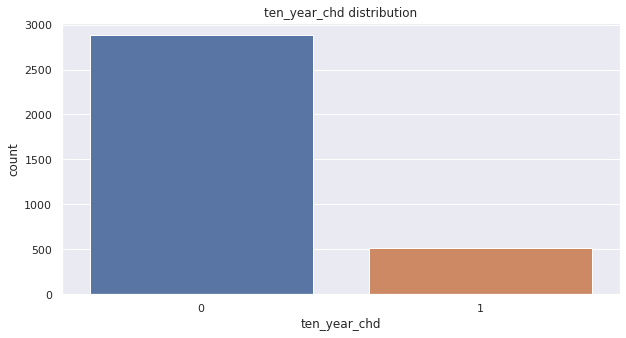

In [ ]:
# Distribution of dependent varaible - ten_year_chd
plt.figure(figsize=(10,5))
sns.countplot(df[dependent_var[0]])
plt.xlabel(dependent_var[0])
plt.title(dependent_var[0]+' distribution')

In [ ]:
# Distribution of dependent variable
df[dependent_var].value_counts()

ten_year_chd
0               2879
1                511
dtype: int64

In [ ]:
# unbalanced distribution
511/(2879+511)

0.15073746312684366

The dependent variable - 10-year risk of coronary heart disease is unbalanced. Only ~15% of the patients in the study were eventually exposed to the risk of this heart disease, rest of the patients were not exposed to this disease after the end of 10 year study.

#Analyzing the distribution of the continuous independent variables

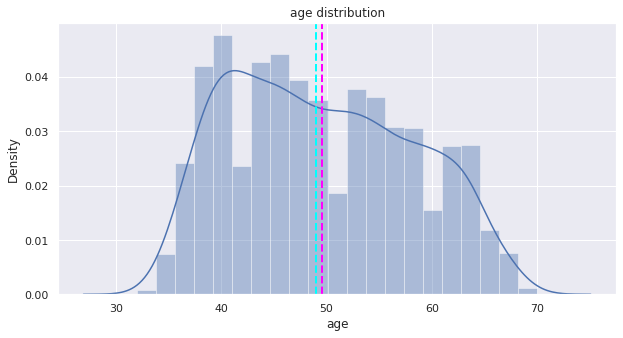

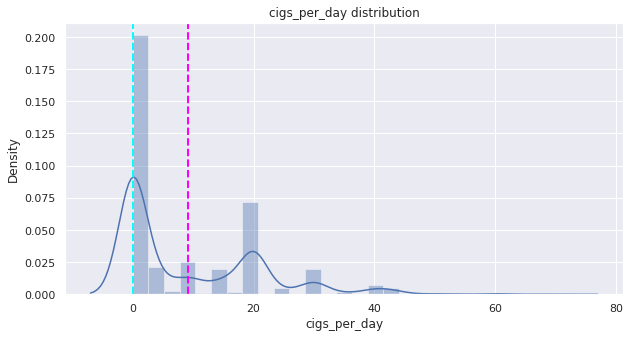

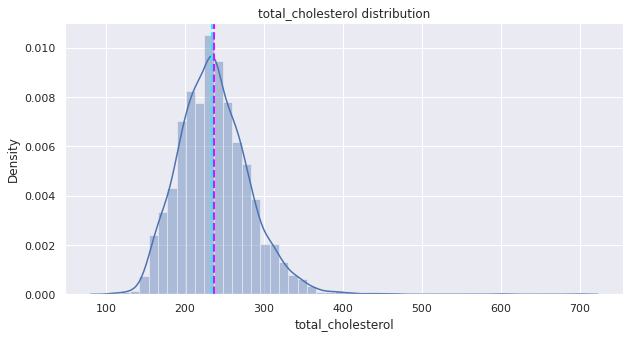

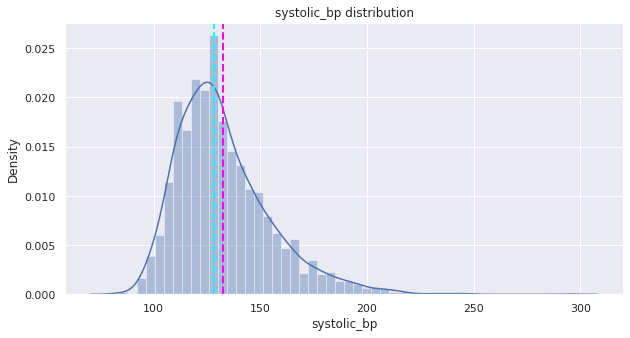

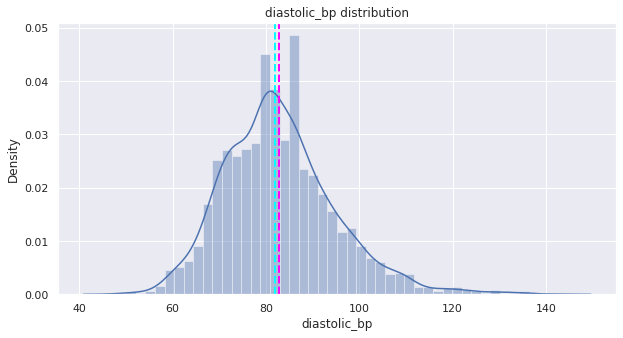

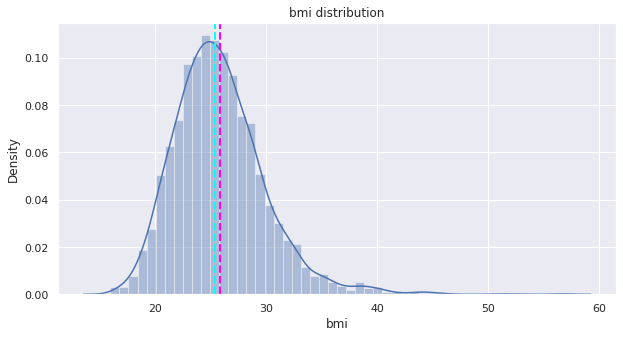

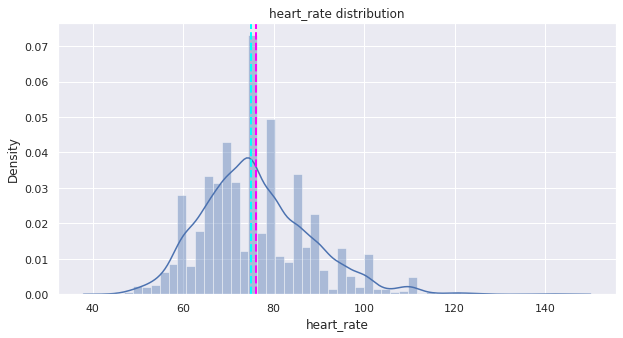

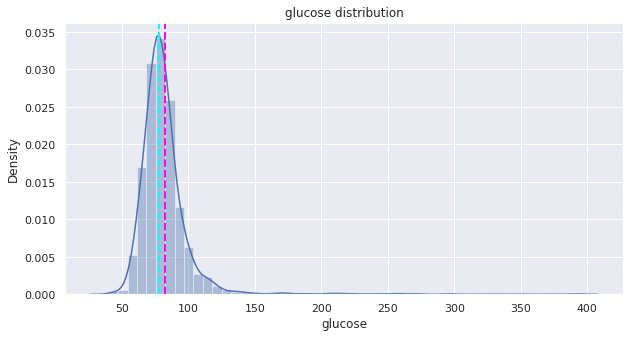

In [ ]:
# Analysing the distribution of continuous variables in the dataset
for col in continuous_var:
  plt.figure(figsize=(10,5))
  sns.distplot(df[col])
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

#Analyzing the distribution of the discrete independent variables

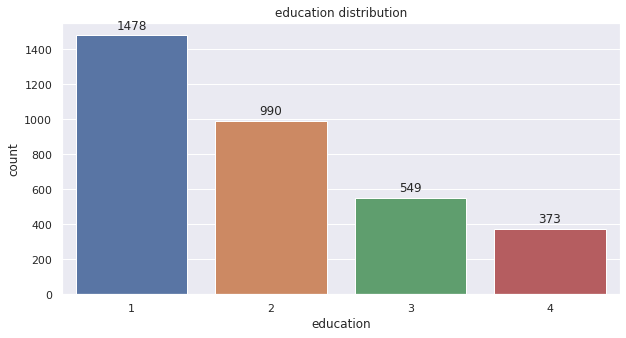

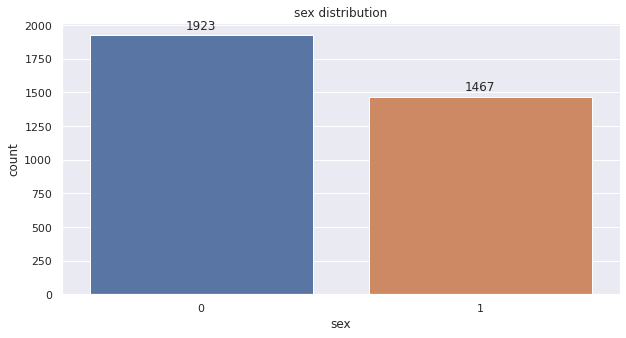

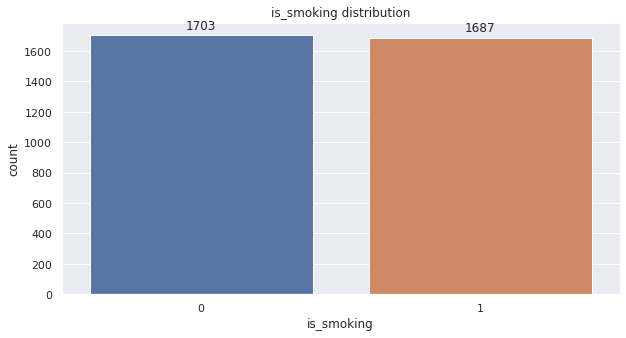

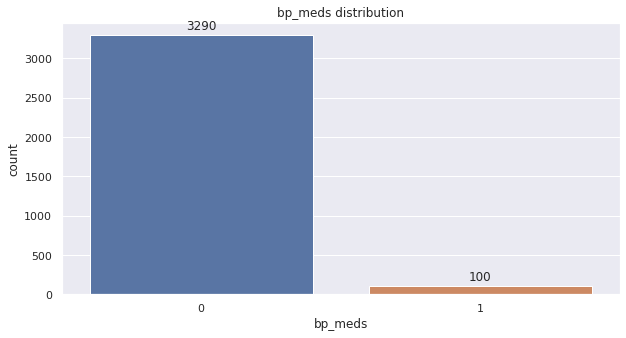

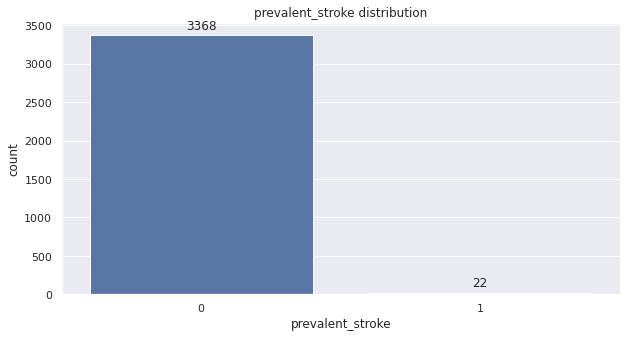

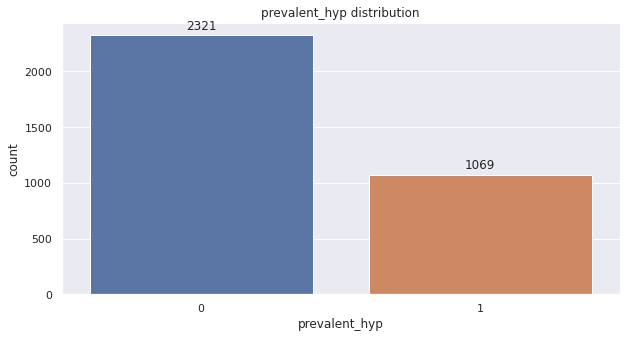

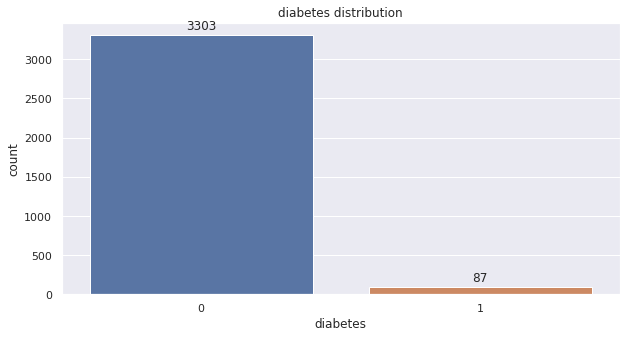

In [ ]:
# Analysing the distribution of categorical variables in the dataset
for i in categorical_var:
  plt.figure(figsize=(10,5))
  p = sns.countplot(df[i])
  plt.xlabel(i)
  plt.title(i+' distribution')
  for i in p.patches:
    p.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
  plt.show()

* Majority of the patients belong to the education level 1, followed by 2, 3, and 4 respectively.
* There are more female patients compared to male patients.
* Almost half the patients are smokers.
* 100 patients under the study are undertaking blood pressure medication.
* 22 patients under the study have experienced a stroke.
* 1069 patients have hypertension.
* 87 patients have diabetes.

#Analyzing the relationship between the dependent variable and the continuous variables in the data

<Figure size 720x360 with 0 Axes>

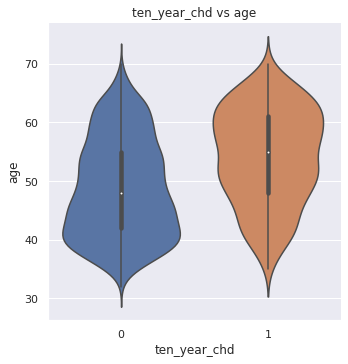

<Figure size 720x360 with 0 Axes>

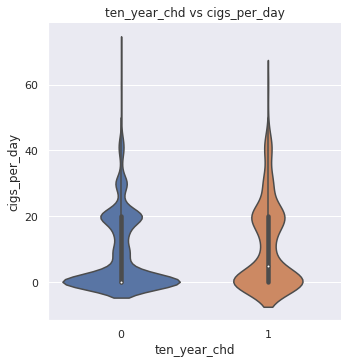

<Figure size 720x360 with 0 Axes>

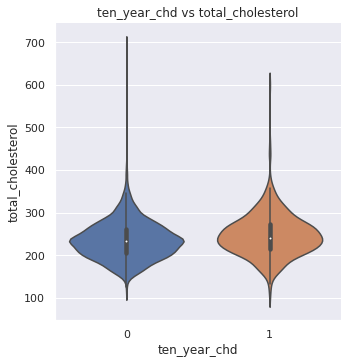

<Figure size 720x360 with 0 Axes>

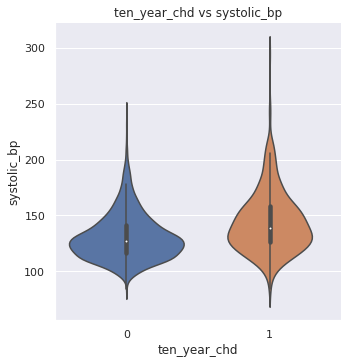

<Figure size 720x360 with 0 Axes>

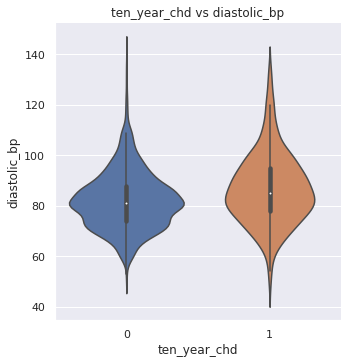

<Figure size 720x360 with 0 Axes>

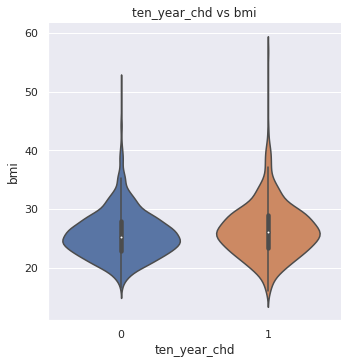

<Figure size 720x360 with 0 Axes>

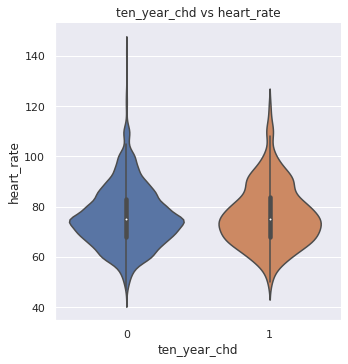

<Figure size 720x360 with 0 Axes>

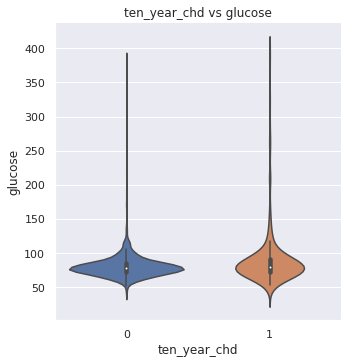

In [ ]:
# Relationship between the dependent variable and continuous independent variables
for i in continuous_var:
  plt.figure(figsize=(10,5))
  sns.catplot(x=dependent_var[0],y=i,data=df,kind='violin')
  plt.ylabel(i)
  plt.xlabel(dependent_var[0])
  plt.title(dependent_var[0]+' vs '+i)
  plt.show()

* The risk of CHD is higher for older patients than younger patients.
* No conclusive evidence on the risk of CHD with other continuous variables

#Analyzing the relationship between the dependent variable and the discrete variables in the data

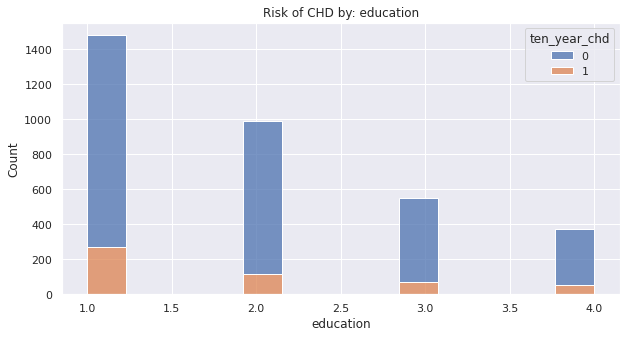

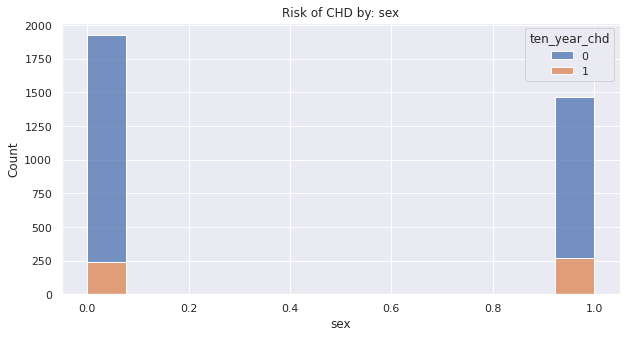

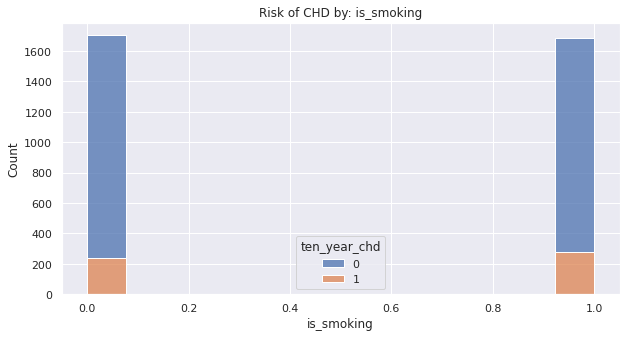

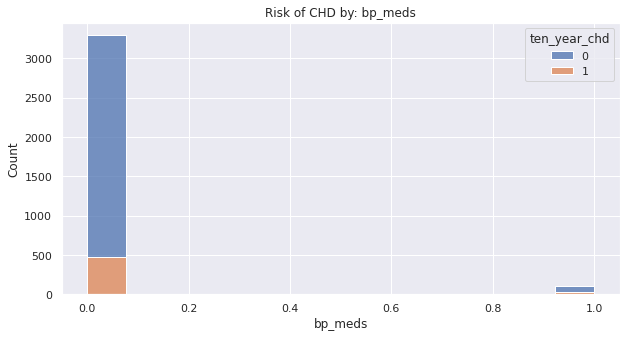

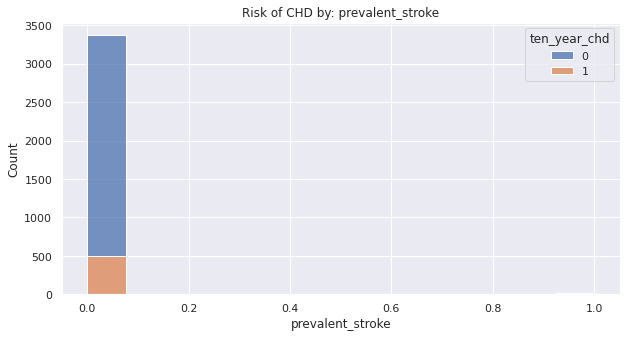

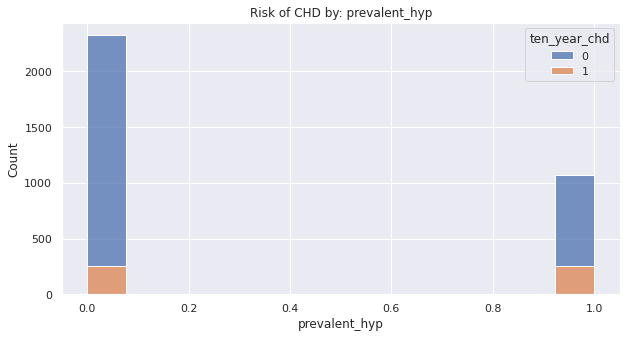

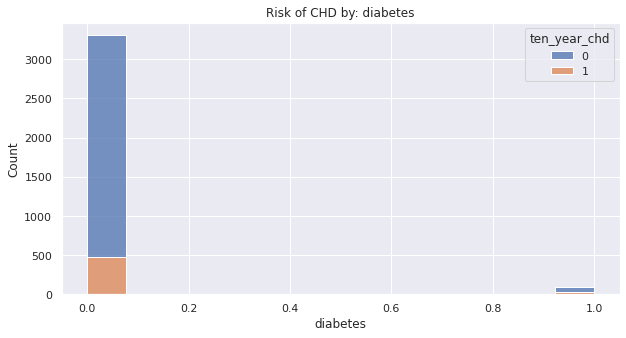

In [ ]:
# Analyzing the relationship between the dependent variable and categorical independent variables
for i in categorical_var:
  plt.figure(figsize=(10,5))
  sns.histplot(x=i, hue=dependent_var[0], data=df, stat="count", multiple="stack")
  plt.title('Risk of CHD by: '+i)
  # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title=i)
  plt.show()

* Since the attributes are unevenly distributed, it is difficult to make direct comparisons and draw conclusions.

**Let's build a 100% stacked bar chart to get a better idea of the distribution of the dependent variable.**

<Figure size 720x360 with 0 Axes>

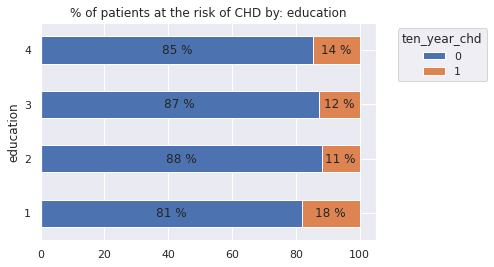

<Figure size 720x360 with 0 Axes>

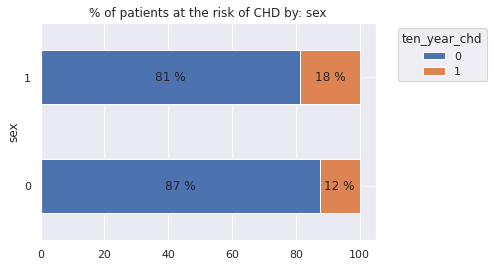

<Figure size 720x360 with 0 Axes>

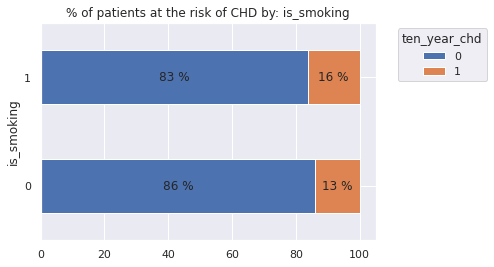

<Figure size 720x360 with 0 Axes>

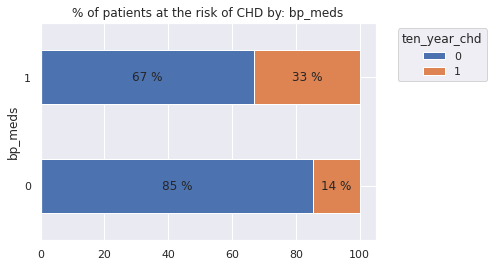

<Figure size 720x360 with 0 Axes>

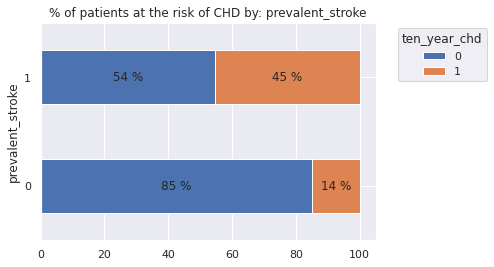

<Figure size 720x360 with 0 Axes>

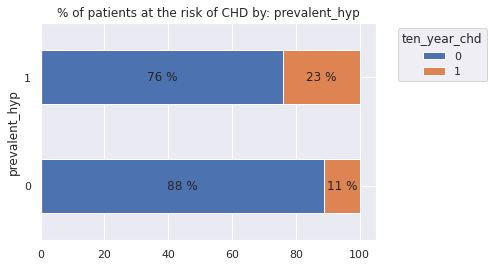

<Figure size 720x360 with 0 Axes>

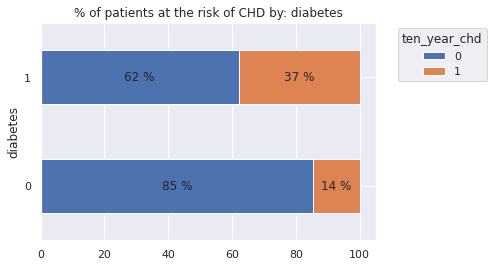

In [ ]:
# 100% stacked bar chart

for i in categorical_var:
    x_var, y_var = i, dependent_var[0]
    plt.figure(figsize=(10,5))
    df_grouped = df.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)*100
    df_grouped.plot.barh(stacked=True)
    plt.legend(
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        title=y_var)

    plt.title("% of patients at the risk of CHD by: "+i)
    for ix, row in df_grouped.reset_index(drop=True).iterrows():
        # print(ix, row)
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    cumulative + element / 2,
                    ix,
                    f"{int(element)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element
    plt.show()

* 18%, 11%, 12%, 14% of the patients belonging to the education level 1, 2, 3, 4 respectively were eventually diagnosed with CHD.
* Male patients have significantly higher risk of CHD (18%) than female patients (12%)
* Patients who smoke have significantly higher risk of CHD (16%) than patients who don't smoke (13%)
* Patients who take BP medicines have significantly higher risk of CHD (33%) than other patients (14%)
* Patients who had experienced a stroke in their life have significantly higher risk of CHD (45%) than other patients (14%)
* Hypertensive patients have significantly higher risk of CHD (23%) than other patients (11%)
* Diabetic patients have significantly higher risk of CHD (37%) than other patients (14%)

# **Correlation Matrix**

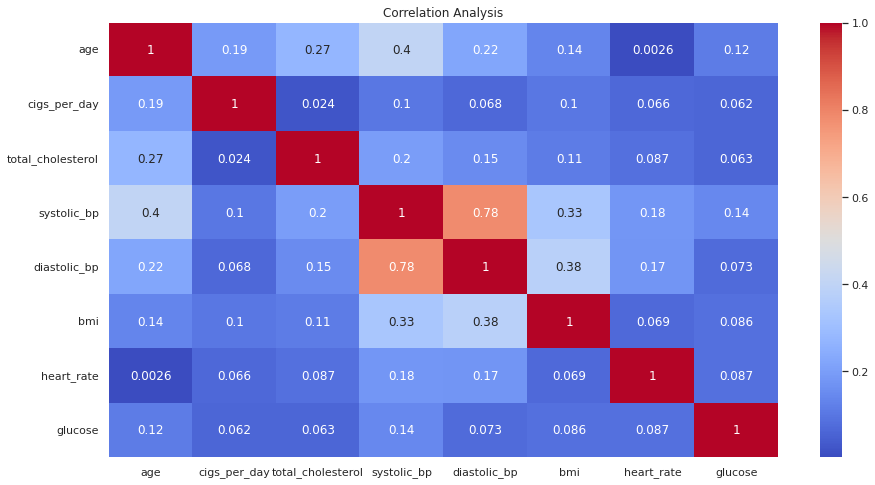

In [ ]:
# Correlation magnitude
plt.figure(figsize=(15,8))
plt.title('Correlation Analysis')
correlation = df[continuous_var].corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

* Above is the correlation magnitude heatmap for all the continuous variables in the dataset.
* The variables systolic BP and diastolic BP are highly correlated.

#Handling Multicollinearity:

In [ ]:
# Range of systolic bp and diastolic bp

print(df['systolic_bp'].min(),df['systolic_bp'].max())
print(df['diastolic_bp'].min(),df['diastolic_bp'].max())

83.5 295.0
48.0 142.5


To handle multicollinearity between these two independent continuous variables, we can replace these two columns with a new variable 'pulse pressure', which is given as follows:

**Pulse Pressure = Systolic BP - Diastolic BP**



In [ ]:
 #Creating a new column pulse_pressure
# and dropping systolic_bp and diastolic_bp

df['pulse_pressure'] = df['systolic_bp']-df['diastolic_bp']
df.drop('systolic_bp',axis=1,inplace=True)
df.drop('diastolic_bp',axis=1,inplace=True)

In [ ]:
# columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigs_per_day',
       'bp_meds', 'prevalent_stroke', 'prevalent_hyp', 'diabetes',
       'total_cholesterol', 'bmi', 'heart_rate', 'glucose', 'ten_year_chd',
       'pulse_pressure'],
      dtype='object')

In [ ]:
# Updating the continuous_var list

continuous_var.remove('systolic_bp')
continuous_var.remove('diastolic_bp')
continuous_var.append('pulse_pressure')

Text(0.5, 1.0, 'Pulse Pressure Distribution')

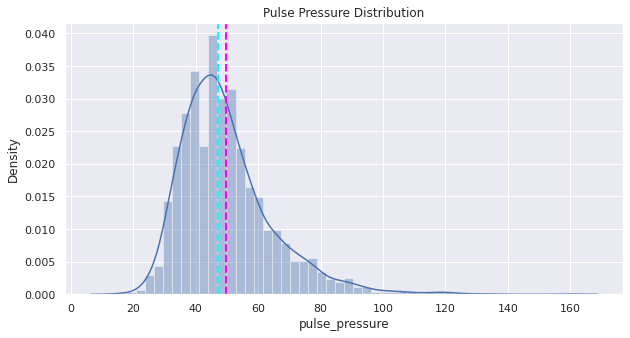

In [ ]:
# Analyzing the distribution of pulse_pressure
plt.figure(figsize=(10,5))
sns.distplot(df['pulse_pressure'])
plt.axvline(df['pulse_pressure'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df['pulse_pressure'].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.title('Pulse Pressure Distribution')

<Figure size 720x360 with 0 Axes>

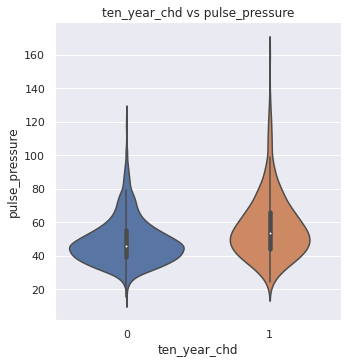

In [ ]:
# Relationship between pulse pressure with the dependent variable
plt.figure(figsize=(10,5))
sns.catplot(x=dependent_var[0],y='pulse_pressure',data=df,kind='violin')
plt.title('ten_year_chd vs pulse_pressure')
plt.show()

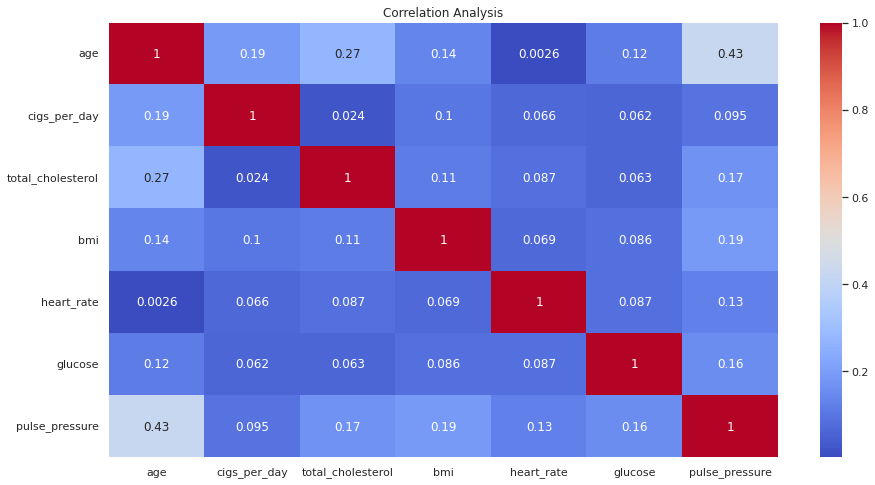

In [ ]:
# Updated correlations
plt.figure(figsize=(15,8))
plt.title('Correlation Analysis')
correlation = df[continuous_var].corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

**We were successful in handling multicollinearity amongst the continuous variables in the dataset.**

# **Feature Selection**

# Discrete feature selection:
To check whether discrete variables are related, chi2 test can be used. We define:

* Null Hypothesis (H0): Two variables are independent.
* Alternate Hypothesis (H1): Two variables are not independent.

We can use Chi2 test to get a p-value and check if a categorical variable is dependent or independent to the dependent variable. If the p value obtained is greater than 0.05 then we reject the null hypothesis, and accept the alternate hypothesis.

In [ ]:
# chi2 scores
chi_scores = chi2(df[categorical_var],df[dependent_var])
chi_scores

(array([ 4.76184162, 13.77838959,  1.98522603, 25.10243827, 15.8619983 ,
        64.37770831, 35.50630598]),
 array([2.90973990e-02, 2.05688680e-04, 1.58840936e-01, 5.43640748e-07,
        6.81331780e-05, 1.02713702e-15, 2.54226209e-09]))

In [ ]:
# P values for discrete features
p_values = pd.Series(chi_scores[1],index = df[categorical_var].columns)
p_values.sort_values(ascending = False , inplace = True)
p_values

is_smoking          1.588409e-01
education           2.909740e-02
sex                 2.056887e-04
prevalent_stroke    6.813318e-05
bp_meds             5.436407e-07
diabetes            2.542262e-09
prevalent_hyp       1.027137e-15
dtype: float64

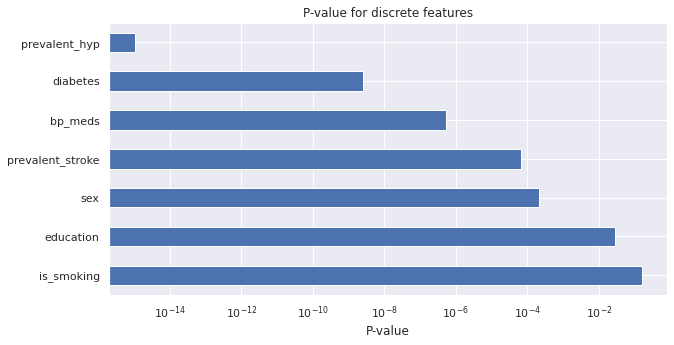

In [ ]:
# Plotting p values for chi2 test for discrete features
plt.figure(figsize=(10,5))
plt.xscale('log')
plt.xlabel('P-value')
plt.title('P-value for discrete features')
p_values.plot.barh()

* Since prevalent hypertension column (prevalent_hyp) has the smallest p value, we can say that it is the most important feature (among the categorical independent variables) which determines the outcome of the dependent variable.
* The is_smoking feature has the highest p-value, which indicates that it is the least important feature (among categorical independent variables).
* We can drop this column since we already have a column cigs_per_day, which gives the number of cigarettes smoked by the patient in a day. The patients who don't smoke have entered zero in this column.

In [ ]:
# dropping is_smoking
df.drop('is_smoking',axis=1,inplace=True)

In [ ]:
# dropping is smoking 
categorical_var.remove('is_smoking')
categorical_var

['education',
 'sex',
 'bp_meds',
 'prevalent_stroke',
 'prevalent_hyp',
 'diabetes']

# Outlier analysis: 

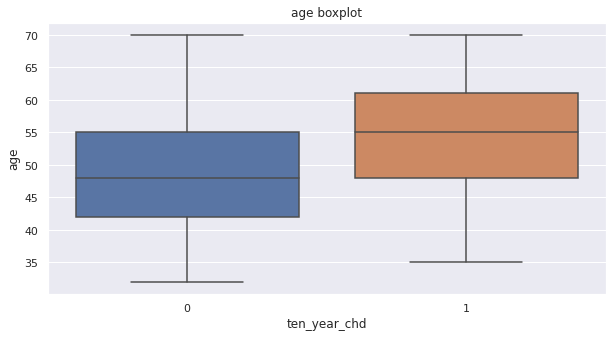

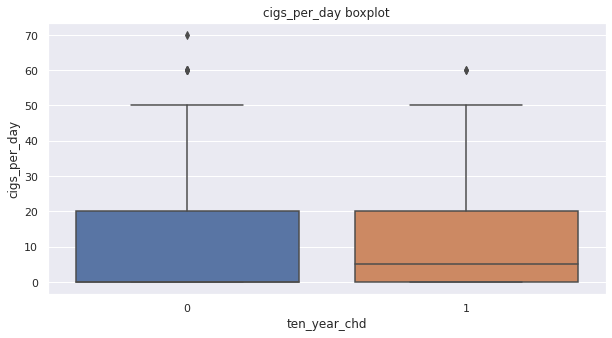

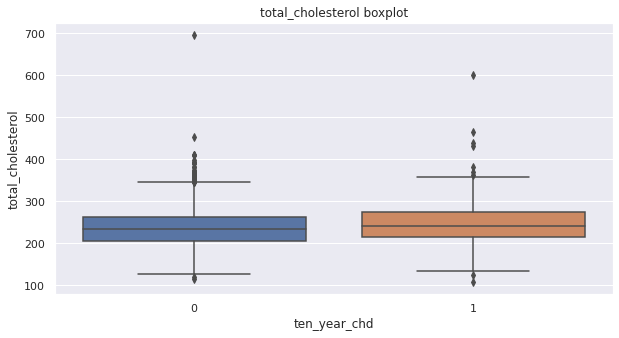

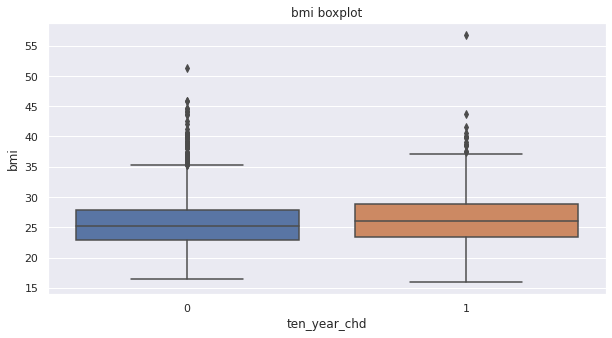

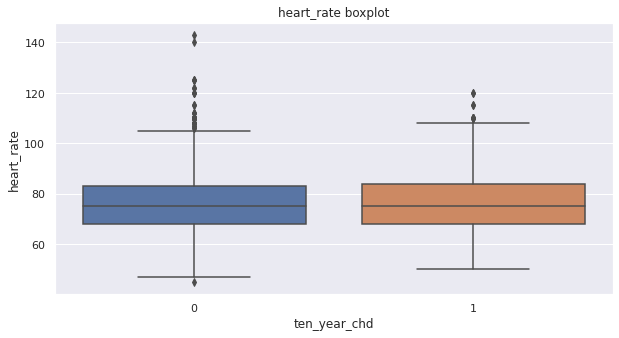

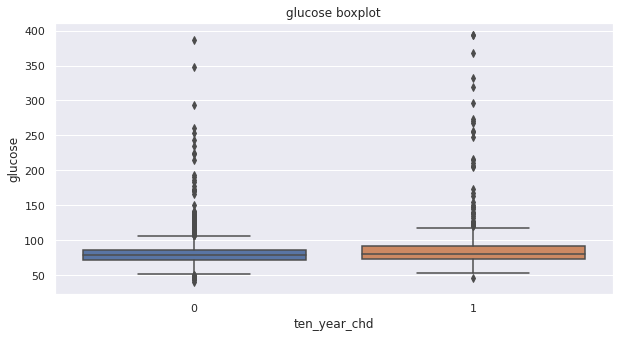

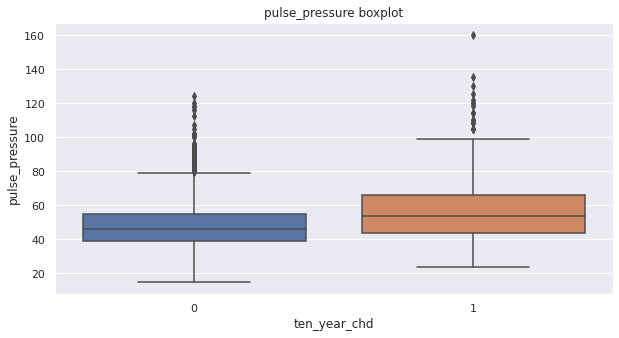

In [ ]:
# checking for outliers in continuous features
for col in continuous_var:
  plt.figure(figsize=(10,5))
  sns.boxplot(y = col,x = dependent_var[0],data=df)
  plt.title(col+' boxplot')
  plt.show()

* There are outliers in the data, the effect of the outliers can be reduced to some extent by transforming it.
* Once the data is transformed, if outliers beyond 3 standard deviations from the mean still remain, then they can be imputed with its respective median value.
* This is done on the train data only to prevent data leakage.

#Transforming continuous variables to reduce skew:

In [ ]:
# skewness along the index axis
(df[continuous_var]).skew(axis = 0)

age                  0.225796
cigs_per_day         1.204077
total_cholesterol    0.948170
bmi                  1.025551
heart_rate           0.676660
glucose              6.342892
pulse_pressure       1.412382
dtype: float64

In [ ]:
# Skew for log10 transformation
np.log10(df[continuous_var]+1).skew(axis = 0)

age                 -0.015053
cigs_per_day         0.275072
total_cholesterol    0.011860
bmi                  0.370422
heart_rate           0.165898
glucose              2.309072
pulse_pressure       0.354174
dtype: float64

In [ ]:
# Implementing log transformation on continuous variables

df['age']                   = np.log10(df['age']+1)
df['cigs_per_day']          = np.log10(df['cigs_per_day']+1)
df['total_cholesterol']     = np.log10(df['total_cholesterol']+1)
df['bmi']                   = np.log10(df['bmi']+1)
df['heart_rate']            = np.log10(df['heart_rate']+1)
df['glucose']               = np.log10(df['glucose']+1)
df['pulse_pressure']        = np.log10(df['pulse_pressure']+1)

In [ ]:
# Checking skew after log transformation
df[continuous_var].skew(axis = 0)

age                 -0.015053
cigs_per_day         0.275072
total_cholesterol    0.011860
bmi                  0.370422
heart_rate           0.165898
glucose              2.309072
pulse_pressure       0.354174
dtype: float64

# Analyzing the distribution of transformed features:

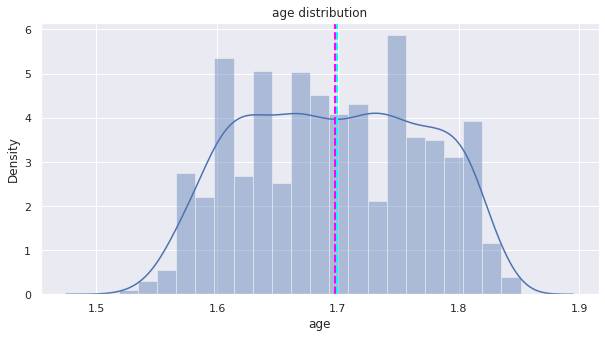

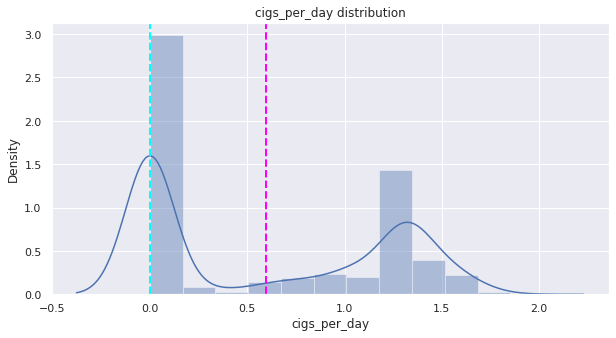

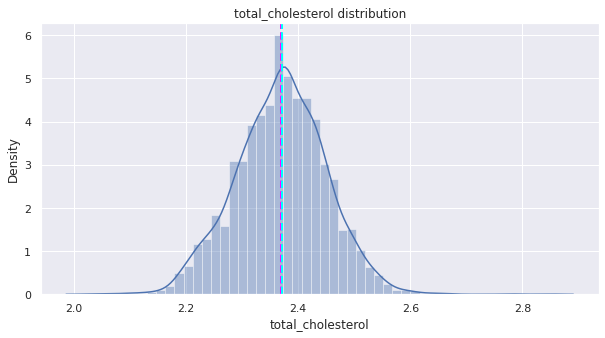

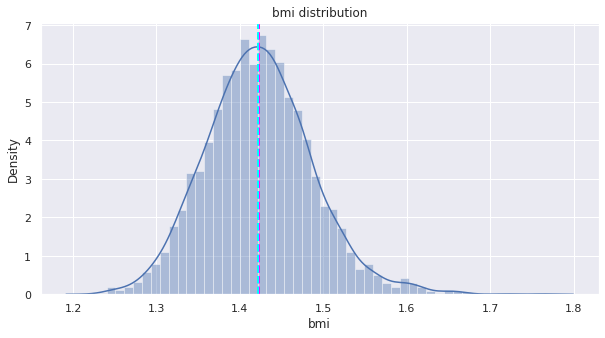

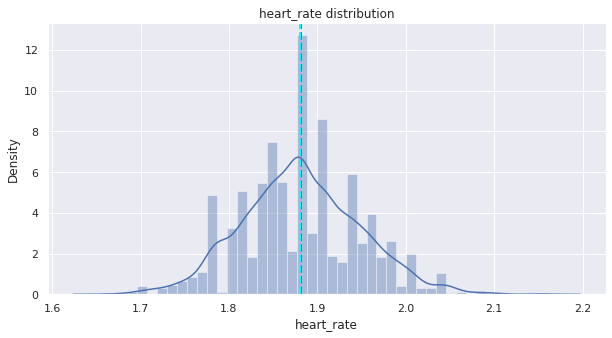

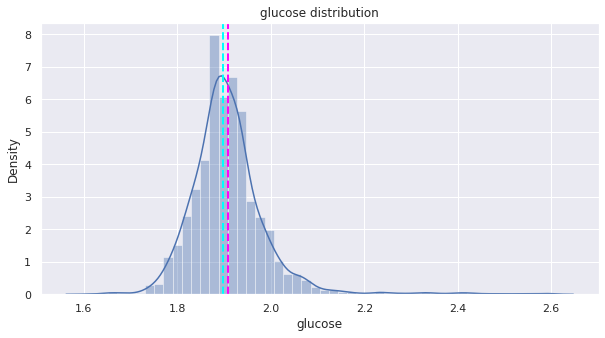

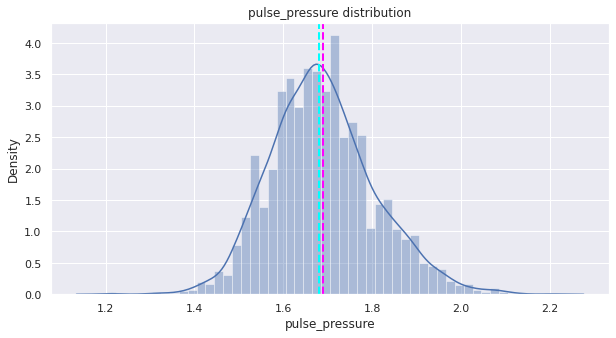

In [ ]:
# Analysing the distribution of continuous varaibles after transformation
for col in continuous_var:
  plt.figure(figsize=(10,5))
  sns.distplot(df[col])
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

Except cigs_per_day, we have successfully been able to reduce the skewness in the continuous variables. Now these distributions are closer to symmetric distribution.

#  Checking for outliers in transformed features:

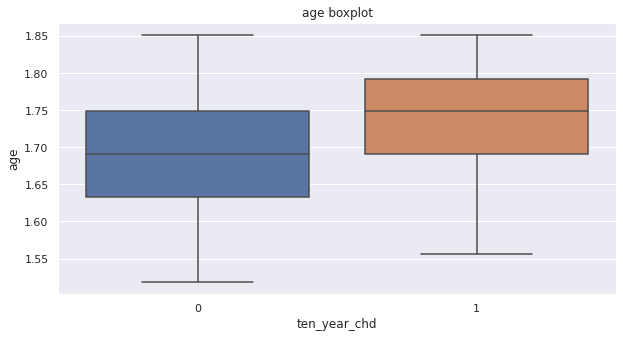

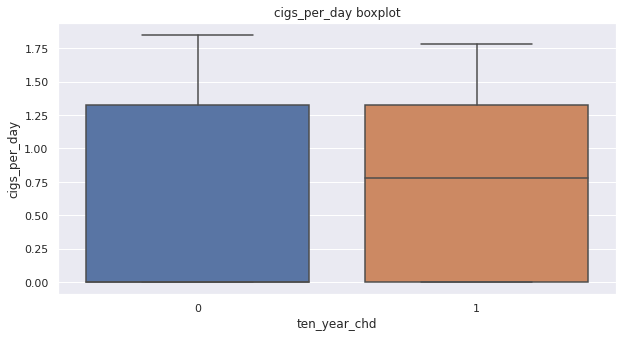

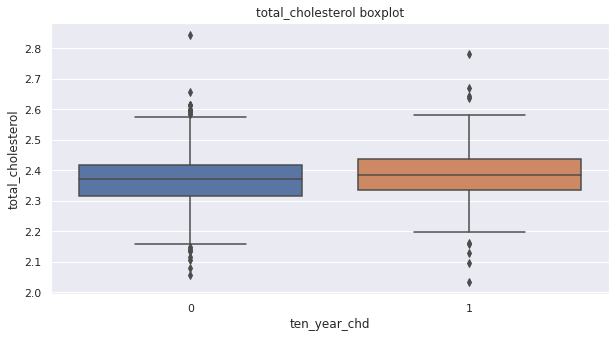

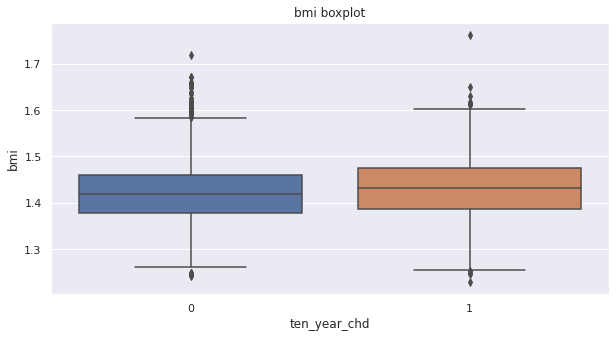

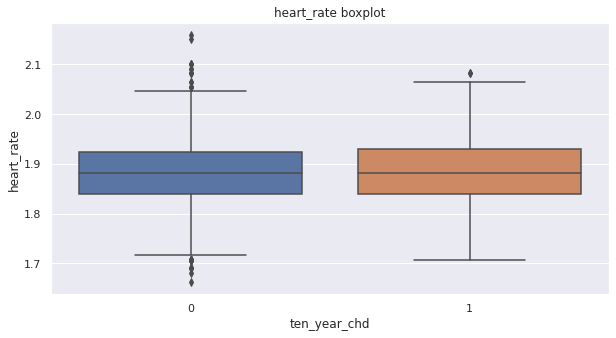

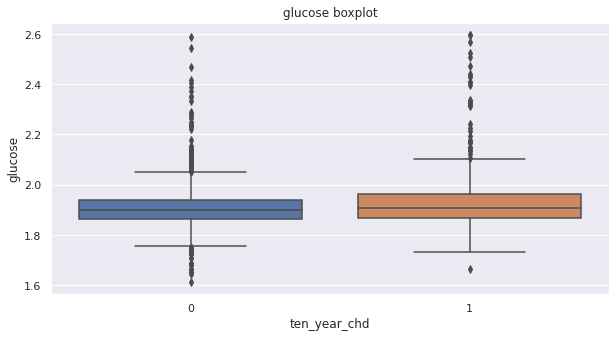

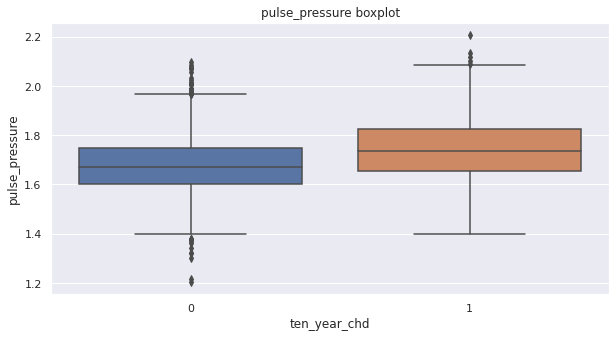

In [ ]:
# checking for outliers in log transformed features
for col in continuous_var:
  plt.figure(figsize=(10,5))
  sns.boxplot(y = col,x = dependent_var[0],data=df)
  plt.title(col+' boxplot')
  plt.show()

* Except for age and cigs_per_day columns, rest of the numerical columns contain outliers even after log transformation.
* To handle this, we can impute the outliers beyond 3 standard deviations from the mean with its median value on the train data.

# **Data Preprocessing**

#Choice of prediction model:
* We are working on binary classification problem.
* Here we can start with a simple model, as a baseline model, which is interpretable, ie, Logistic Regression
* Try other standard binary classification models like K nearest neighbors, Naive Bayes, decision tree classifier, and support vector machines.
* Use ensemble models, with hyperparameter tuning to check whether they give better predictions.

# Evaluation metrics:
* Since the data we are dealing with is unbalanced, accuracy may not be the best evaluation metric to evaluate the model performance.
* Also, since we are dealing with data related to healthcare, False Negatives are of higher concern than False Positive
* In other words, it doesn’t matter whether we raise a false alarm but the actual positive cases should not go undetected
* Considering these points in mind, it is decided that we use Recall as the model evaluation metric.

 **Recall = True positive / True positive + False Negative**
 


In [ ]:
# Defining dependent and independent variables
X = df.drop('ten_year_chd',axis=1)
y = df[dependent_var]

In [ ]:
# function to get recall score
def recall(actual,predicted):
  '''
  recall(actual,predicted)
  '''
  return recall_score(y_true=actual, y_pred=predicted, average='binary')

# Train Test Split:

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y, shuffle=True)

In [ ]:
# Checking the train distribution of dependent variable
y_train.value_counts()

ten_year_chd
0               2015
1                358
dtype: int64

In [ ]:
# Proportion of positive outcomes in train dataset
358/(358+2015)

0.15086388537715972

In [ ]:
# Checking the test distribution of dependent variable
y_test.value_counts()

ten_year_chd
0               864
1               153
dtype: int64

In [ ]:
# Proportion of positive outcomes in test dataset
153/(153+864)

0.1504424778761062

# Handling outliers in the train data

In [ ]:
# imputing the outliers beyond 3 standard deviations from the mean with its median value
for i in ['total_cholesterol', 'bmi', 'heart_rate', 'glucose','pulse_pressure']:
  upper_lim = X_train[i].mean() + 3 * X_train[i].std()
  lower_lim = X_train[i].mean() - 3 * X_train[i].std()
  X_train.loc[(X_train[i] > upper_lim),i] = X_train[i].median()
  X_train.loc[(X_train[i] < lower_lim),i] = X_train[i].median()

In [ ]:
X_train[continuous_var].skew(axis = 0)

age                 -0.035936
cigs_per_day         0.297586
total_cholesterol   -0.046628
bmi                  0.215412
heart_rate           0.074472
glucose              0.393506
pulse_pressure       0.270388
dtype: float64

# Oversampling

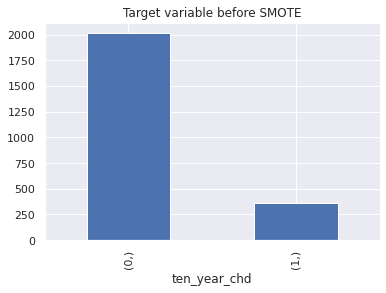

In [ ]:
# visualize the target variable before SMOTE
y_train.value_counts().plot(kind='bar', title='Target variable before SMOTE')

In [ ]:
# Oversampling using SMOTE
smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Samples in the original dataset', len(y_train))
print('Samples in the resampled dataset', len(y_smote))

Samples in the original dataset 2373
Samples in the resampled dataset 4030


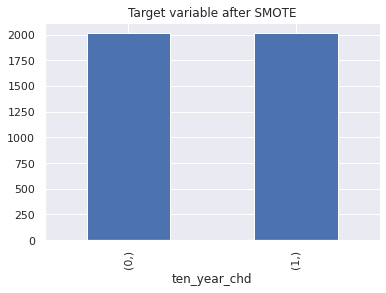

In [ ]:
# visualize the target variable after SMOTE
y_smote.value_counts().plot(kind='bar', title='Target variable after SMOTE')

We have successfully oversampled the minority class using SMOTE. Now the model we build will be able to learn from both the classes without any bias.

#Scaling the data

In [ ]:
# Scaling data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_smote_scaled = scaler.fit_transform(X_smote)
X_test_scaled = scaler.transform(X_test)

# Converting array to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_smote_scaled = pd.DataFrame(X_smote_scaled,columns=X_smote.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [ ]:
# Scaled train values
X_train_scaled.head()

,id,age,education,sex,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,bmi,heart_rate,glucose,pulse_pressure
0,0.421853,1.352753,1.042877,1.126340,1.152968,-0.178155,-0.087426,-0.685091,-0.171759,0.279319,-0.546622,-0.267146,-0.522470,0.021221
1,-1.533156,0.238381,-0.929033,1.126340,1.418967,-0.178155,-0.087426,-0.685091,-0.171759,0.165020,0.828332,-0.454995,-1.079272,-0.058061
2,-1.404176,0.872536,-0.929033,1.126340,1.152968,-0.178155,-0.087426,-0.685091,-0.171759,0.714396,0.670299,-0.175143,1.525800,-0.392623
3,-1.045673,1.444209,-0.929033,-0.887831,-0.926396,-0.178155,-0.087426,1.459660,-0.171759,2.429594,0.459589,0.841085,1.718543,1.281191
4,0.239047,0.457551,-0.929033,-0.887831,1.152968,-0.178155,-0.087426,-0.685091,-0.171759,0.211021,-1.740096,-0.454995,-0.434080,0.021221


In [ ]:
# scaled SMOTE values
X_smote_scaled.head()

,id,age,education,sex,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,bmi,heart_rate,glucose,pulse_pressure
0,0.409865,1.207331,1.352503,1.309124,1.181688,-0.139567,-0.072376,-0.653494,-0.144118,0.216422,-0.644124,-0.311933,-0.587190,-0.162346
1,-1.556435,0.012255,-0.792553,1.309124,1.464423,-0.139567,-0.072376,-0.653494,-0.144118,0.092991,0.787575,-0.512750,-1.175376,-0.245347
2,-1.426710,0.692336,-0.792553,1.309124,1.181688,-0.139567,-0.072376,-0.653494,-0.144118,0.686259,0.623020,-0.213578,1.576530,-0.595601
3,-1.066137,1.305410,-0.792553,-0.763870,-1.028512,-0.139567,-0.072376,1.530237,-0.144118,2.538492,0.403614,0.872804,1.780136,1.156721
4,0.226003,0.247297,-0.792553,-0.763870,1.181688,-0.139567,-0.072376,-0.653494,-0.144118,0.142668,-1.886852,-0.512750,-0.493818,-0.162346


In [ ]:
# scaled test values
X_test_scaled.head()

,id,age,education,sex,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,bmi,heart_rate,glucose,pulse_pressure
0,-0.861846,-1.779397,0.279975,1.309124,1.181688,-0.139567,-0.072376,1.530237,-0.144118,0.408786,0.780286,0.439803,-1.597084,-0.782862
1,-0.511487,-0.751299,2.425031,1.309124,0.272233,-0.139567,-0.072376,1.530237,-0.144118,-0.240318,0.900819,-1.851135,0.458182,0.975094
2,-0.594225,-1.467938,0.279975,-0.763870,-1.028512,-0.139567,-0.072376,-0.653494,-0.144118,-1.464122,-1.384872,-0.512750,-0.044885,-0.373147
3,-0.303110,-0.357828,-0.792553,-0.763870,-1.028512,-0.139567,-0.072376,-0.653494,-0.144118,0.994576,0.449557,-0.311933,-0.220997,0.375169
4,1.306702,-0.888181,0.279975,-0.763870,1.464423,-0.139567,-0.072376,-0.653494,-0.144118,0.216422,-0.331433,-1.151013,0.041527,-0.460659


We have successfully scaled down the variables using standard scaler.

# **Model Implementation**

#   Logistic Regression




In [ ]:
# Fitting model
lr_model = LogisticRegression()

In [ ]:
# training the model
lr_model.fit(X_smote_scaled, y_smote)

LogisticRegression()

In [ ]:
# Train predictions
lr_train_pred = lr_model.predict(X_smote_scaled)

In [ ]:
# training set recall
lr_train_recall = recall(y_smote,lr_train_pred)
lr_train_recall

0.7295285359801489

In [ ]:
# Test predictions
lr_test_pred = lr_model.predict(X_test_scaled)

In [ ]:
# Test recall
lr_test_recall = recall(y_test,lr_test_pred)
lr_test_recall

0.5751633986928104

In [ ]:
# Classification report
print(classification_report(y_test,lr_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.67      0.77       864
           1       0.24      0.58      0.33       153

    accuracy                           0.65      1017
   macro avg       0.57      0.62      0.55      1017
weighted avg       0.80      0.65      0.70      1017



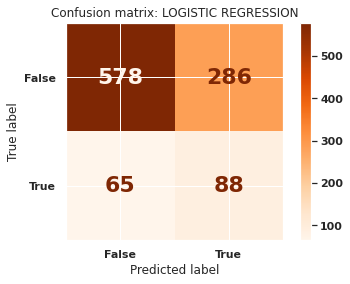

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import ConfusionMatrixDisplay as cmd
lr_confusion_matrix = cm(y_test, lr_test_pred)
cm_display = cmd(confusion_matrix = lr_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: LOGISTIC REGRESSION')
plt.show()

False negatives obtained after using logistic regression: 50

# K Nearest Neighbors

In [ ]:
 #Value of k taken upto sqrt(n)
# Where n is no of records in the train dataset
# sqrt(4030) = 63.48
knn_test_res = []
knn_train_res = []
for k in range(1,65):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_smote_scaled, y_smote)
  knn_train_pred = knn_model.predict(X_smote_scaled)
  knn_train_recall = recall(y_smote,knn_train_pred)
  knn_test_pred = knn_model.predict(X_test_scaled)
  knn_test_recall = recall(y_test,knn_test_pred)
  knn_test_res.append(knn_test_recall)
  knn_train_res.append(knn_train_recall)

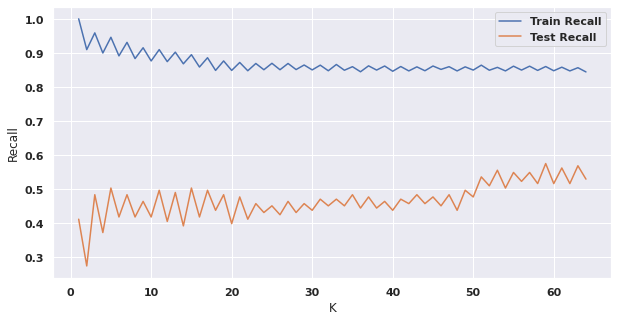

In [ ]:
# Plotting the train and test recalls for different values of k
plt.figure(figsize=(10,5))
x_ = range(1,65)
y1 = knn_train_res
y2 = knn_test_res
plt.plot(x_, y1, label='Train Recall')
plt.plot(x_, y2, label = 'Test Recall')
plt.xlabel('K')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [ ]:

# Best k is where the test recall is the highest
best_k = knn_test_res.index(max(knn_test_res))+1
best_k

59

In [ ]:
# building knn model with best parameters
knn_model = KNeighborsClassifier(n_neighbors=best_k)

In [ ]:
# training the model
knn_model.fit(X_smote_scaled, y_smote)

KNeighborsClassifier(n_neighbors=59)

In [ ]:
# Train predictions
knn_train_pred = knn_model.predict(X_smote_scaled)

In [ ]:
# training set recall
knn_train_recall = recall(y_smote,knn_train_pred)
knn_train_recall

0.8600496277915632

In [ ]:
# Test predictions
knn_test_pred = knn_model.predict(X_test_scaled)

In [ ]:
# Test recall
knn_test_recall = recall(y_test,knn_test_pred)
knn_test_recall

0.5751633986928104

In [ ]:
# Classification report
print(classification_report(y_test,knn_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.58      0.70       864
           1       0.19      0.58      0.29       153

    accuracy                           0.58      1017
   macro avg       0.54      0.58      0.49      1017
weighted avg       0.78      0.58      0.64      1017



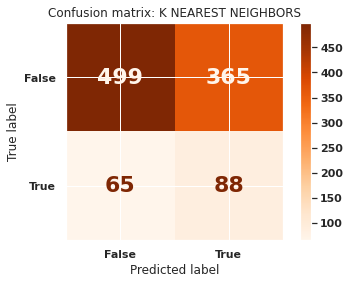

In [ ]:
# Confusion matrix
knn_confusion_matrix = cm(y_test, knn_test_pred)
cm_display = cmd(confusion_matrix = knn_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: K NEAREST NEIGHBORS')
plt.show()

False negatives obtained after using KNN: 44

# Naive Bayes

In [ ]:
# Using stratified k fold cross validation so that each split 
# has almost equal proportion of classification results
cv_method = RepeatedStratifiedKFold(n_splits=4,
                                    n_repeats=3, 
                                    random_state=0)

In [ ]:
# Fitting model
nb_model = GaussianNB()

In [ ]:
# Max depth of dt without hyperparameter tuning = 28 and min samples leaf = 1
nb_model = GaussianNB()
nb_params = {'var_smoothing': np.logspace(0,-9, num=100)
             }

In [ ]:
nb_gridsearch = GridSearchCV(nb_model,
                             nb_params,
                             cv=cv_method,
                             scoring= 'recall')
nb_gridsearch.fit(X_smote_scaled,y_smote)
nb_best_params = nb_gridsearch.best_params_

In [ ]:
# model best parameters
nb_best_params

{'var_smoothing': 1.0}

In [ ]:
# building knn model with best parameters
nb_model = GaussianNB(var_smoothing=nb_best_params['var_smoothing'])

In [ ]:
# training the model
nb_model.fit(X_smote_scaled, y_smote)

GaussianNB(var_smoothing=1.0)

In [ ]:
# Train predictions
nb_train_pred = nb_model.predict(X_smote_scaled)

In [ ]:
# training set recall
nb_train_recall = recall(y_smote,nb_train_pred)
nb_train_recall

0.8843672456575682

In [ ]:
# Test predictions
nb_test_pred = nb_model.predict(X_test_scaled)

In [ ]:
# Test recall
nb_test_recall = recall(y_test,nb_test_pred)
nb_test_recall

0.673202614379085

In [ ]:
# Classification report
print(classification_report(y_test,nb_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.48      0.62       864
           1       0.19      0.67      0.29       153

    accuracy                           0.51      1017
   macro avg       0.54      0.57      0.46      1017
weighted avg       0.79      0.51      0.57      1017



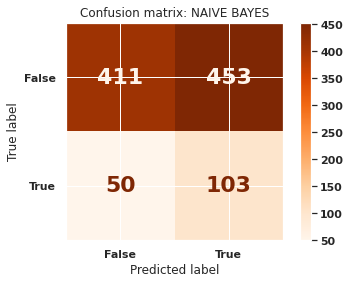

In [ ]:
# Confusion matrix
nb_confusion_matrix = cm(y_test, nb_test_pred)
cm_display = cmd(confusion_matrix = nb_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: NAIVE BAYES')
plt.show()

False negatives obtained after using Naive Bayes: 72

#Decision Tree

In [ ]:
# Max depth of dt without hyperparameter tuning = 28 and min samples leaf = 1
dt_model = DecisionTreeClassifier()
dt_params = {'max_depth':np.arange(1,10),
             'min_samples_split':np.arange(0.1,1,0.1),
             'min_samples_leaf':np.arange(0.1,0.6,0.1)
             }

In [ ]:
# using gridsearchcv to find best parameters
dt_gridsearch = GridSearchCV(dt_model,
                             dt_params,
                             cv=cv_method,
                             scoring= 'recall')
dt_gridsearch.fit(X_smote,y_smote)
dt_best_params = dt_gridsearch.best_params_

In [ ]:
# model best parameters
dt_best_params

{'max_depth': 1, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}

In [ ]:
# building knn model with best parameters
dt_model = DecisionTreeClassifier(max_depth=dt_best_params['max_depth'],
                                  min_samples_split=dt_best_params['min_samples_split'],
                                  min_samples_leaf=dt_best_params['min_samples_leaf'])

In [ ]:
# training the model 
dt_model.fit(X_smote_scaled, y_smote)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=0.1, min_samples_split=0.1)

In [ ]:
# Train predictions
dt_train_pred = dt_model.predict(X_smote_scaled)

In [ ]:
# training set recall
dt_train_recall = recall(y_smote,dt_train_pred)
dt_train_recall

0.8689826302729529

In [ ]:
# Test predictions
dt_test_pred = dt_model.predict(X_test_scaled)

In [ ]:
# Test recall
dt_test_recall = recall(y_test,dt_test_pred)
dt_test_recall

0.7712418300653595

In [ ]:
# Classification report
print(classification_report(y_test,dt_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.47      0.62       864
           1       0.21      0.77      0.32       153

    accuracy                           0.52      1017
   macro avg       0.56      0.62      0.47      1017
weighted avg       0.81      0.52      0.58      1017



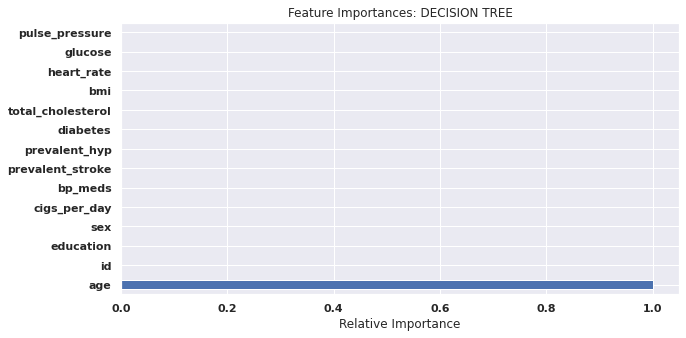

In [ ]:
# Feature importances

dt_feat_imp = pd.Series(dt_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: DECISION TREE')
plt.xlabel('Relative Importance')
dt_feat_imp.nlargest(20).plot(kind='barh')

Only one feature (age) was given imporatance while fitting a decision tree model. This is because of max depth being 1.

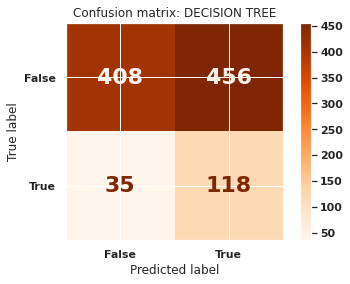

In [ ]:
# Confusion matrix
dt_confusion_matrix = cm(y_test, dt_test_pred)
cm_display = cmd(confusion_matrix = dt_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: DECISION TREE')
plt.show()

# Support Vector Machines:

In [ ]:
# SVM model parameters
svm_model = SVC()
svm_params = {'C': [0.1, 1, 10],
              'gamma': [0.01, 0.001, 0.0001],
              'kernel': ['rbf']
             }

In [ ]:
# Using gridsearchcv to find best parameters
svm_gridsearch = GridSearchCV(svm_model,
                              svm_params,
                              cv=cv_method,
                              scoring= 'recall')
svm_gridsearch.fit(X_smote_scaled,y_smote)
svm_best_params = svm_gridsearch.best_params_

In [ ]:
# model best parameters
svm_best_params

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
# building knn model with best parameters
svm_model = SVC(C=svm_best_params['C'],
                gamma=svm_best_params['gamma'],
                kernel=svm_best_params['kernel']
                )

In [ ]:
# training the model 
svm_model.fit(X_smote_scaled, y_smote)


SVC(C=10, gamma=0.01)

In [ ]:
# Train predictions
svm_train_pred = svm_model.predict(X_smote_scaled)

In [ ]:
# training set recall
svm_train_recall = recall(y_smote,svm_train_pred)
svm_train_recall

0.8054590570719603

In [ ]:
# Test predictions
svm_test_pred = svm_model.predict(X_test_scaled)

In [ ]:
# Test recall
svm_test_recall = recall(y_test,svm_test_pred)
svm_test_recall

0.39215686274509803

In [ ]:
# Classification report
print(classification_report(y_test,svm_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.70      0.77       864
           1       0.19      0.39      0.25       153

    accuracy                           0.65      1017
   macro avg       0.53      0.55      0.51      1017
weighted avg       0.76      0.65      0.70      1017



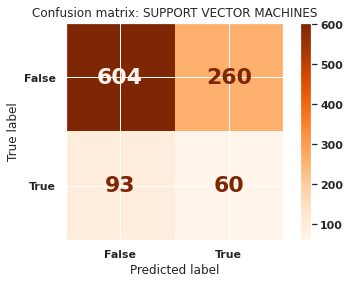

In [ ]:

# Confusion matrix
svm_confusion_matrix = cm(y_test, svm_test_pred)
cm_display = cmd(confusion_matrix = svm_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: SUPPORT VECTOR MACHINES')
plt.show()

False negatives obtained after using SVM: 51

# XG Boost

In [ ]:
# XGBOOST model
xgb_model = xgb.XGBClassifier(random_state=0)
xgb_params = {'n_estimators':[500],                    # limited due to computational power availability
             'max_depth':[1],
             'min_samples_split':np.arange(0.1,1,0.1),
             'min_samples_leaf':np.arange(0.1,0.6,0.1)}

In [ ]:

# using gridsearchcv to find best parameters
xgb_gridsearch = GridSearchCV(xgb_model,
                              xgb_params,
                              cv=cv_method,
                              scoring='recall')
xgb_gridsearch.fit(X_smote_scaled,y_smote)
xgb_best_params = xgb_gridsearch.best_params_

In [ ]:
# best parameters for xgboost classifier
xgb_best_params

{'max_depth': 1,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1,
 'n_estimators': 500}

In [ ]:
# Fitting xgb with best parameters
xgb_model = xgb.XGBClassifier(n_estimators=xgb_best_params['n_estimators'],
                                  min_samples_leaf=xgb_best_params['min_samples_leaf'],
                                  min_samples_split=xgb_best_params['min_samples_split'],
                                  max_depth=xgb_best_params['max_depth'],
                                  random_state=0)

In [ ]:
# fit
xgb_model.fit(X_smote_scaled,y_smote)

XGBClassifier(max_depth=1, min_samples_leaf=0.1, min_samples_split=0.1,
              n_estimators=500)

In [ ]:
# train predictions
xgb_train_pred = xgb_model.predict(X_smote_scaled)
xgb_train_pred = [round(value) for value in xgb_train_pred]

In [ ]:
# train recall
xgb_train_recall = recall(y_smote,xgb_train_pred)
xgb_train_recall

0.7866004962779156

In [ ]:
# Test predictions
xgb_test_pred = xgb_model.predict(X_test_scaled)
xgb_test_pred = [round(value) for value in xgb_test_pred]

In [ ]:
# test recall
xgb_test_recall = recall(y_test,xgb_test_pred)
xgb_test_recall

0.35947712418300654

In [ ]:
# Classification report
print(classification_report(y_test,xgb_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82       864
           1       0.22      0.36      0.27       153

    accuracy                           0.71      1017
   macro avg       0.54      0.56      0.54      1017
weighted avg       0.77      0.71      0.73      1017



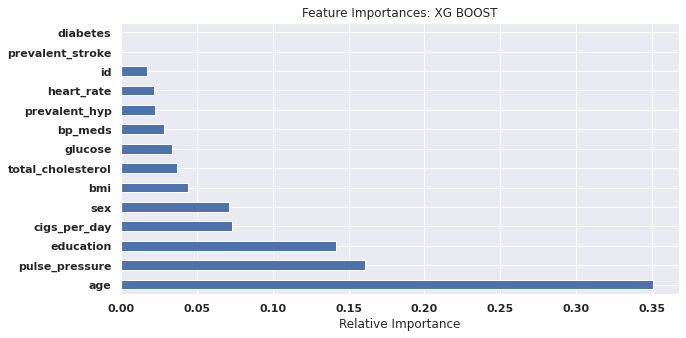

In [ ]:
# Feature importances

xgb_feat_imp = pd.Series(xgb_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: XG BOOST')
plt.xlabel('Relative Importance')
xgb_feat_imp.nlargest(20).plot(kind='barh')

* Age in the most important feature in deciding the outcome of the variables for XG boost.
* Multiple features are given importance here rather than just one feature in case of decision tree.

In [ ]:
print(classification_report(y_test,xgb_test_pred,target_names=['Negative','Positive']))

              precision    recall  f1-score   support

    Negative       0.87      0.77      0.82       864
    Positive       0.22      0.36      0.27       153

    accuracy                           0.71      1017
   macro avg       0.54      0.56      0.54      1017
weighted avg       0.77      0.71      0.73      1017



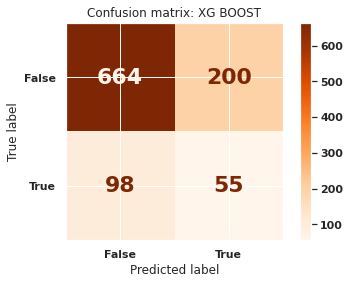

In [ ]:
# Confusion matrix
xgb_confusion_matrix = cm(y_test, xgb_test_pred)
cm_display = cmd(confusion_matrix = xgb_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: XG BOOST')
plt.show()

False negatives obtained after using XG Boost: 59

# Results:

The train and test recall scores obtained for different models built are as follows:

In [ ]:
# Summarizing the results obtained
test = PrettyTable(['Sl. No.','Classification Model', 'Train Recall (%)','Test Recall (%)'])
test.add_row(['1','Logistic Regression',lr_train_recall*100,lr_test_recall*100])
test.add_row(['2','K Nearest Neighbors',knn_train_recall*100,knn_test_recall*100])
test.add_row(['3','Naive Bayes',nb_train_recall*100,nb_test_recall*100])
test.add_row(['4','Decision Tree',dt_train_recall*100,dt_test_recall*100])
test.add_row(['5','Support Vector Machines',svm_train_recall*100,svm_test_recall*100])
test.add_row(['7','XG Boost',xgb_train_recall*100,xgb_test_recall*100])
print(test)

+---------+-------------------------+-------------------+--------------------+
| Sl. No. |   Classification Model  |  Train Recall (%) |  Test Recall (%)   |
+---------+-------------------------+-------------------+--------------------+
|    1    |   Logistic Regression   | 72.95285359801488 | 57.51633986928104  |
|    2    |   K Nearest Neighbors   | 86.00496277915633 | 57.51633986928104  |
|    3    |       Naive Bayes       | 88.43672456575682 |  67.3202614379085  |
|    4    |      Decision Tree      | 86.89826302729529 | 77.12418300653596  |
|    5    | Support Vector Machines | 80.54590570719603 | 39.21568627450981  |
|    7    |         XG Boost        | 78.66004962779157 | 35.947712418300654 |
+---------+-------------------------+-------------------+--------------------+


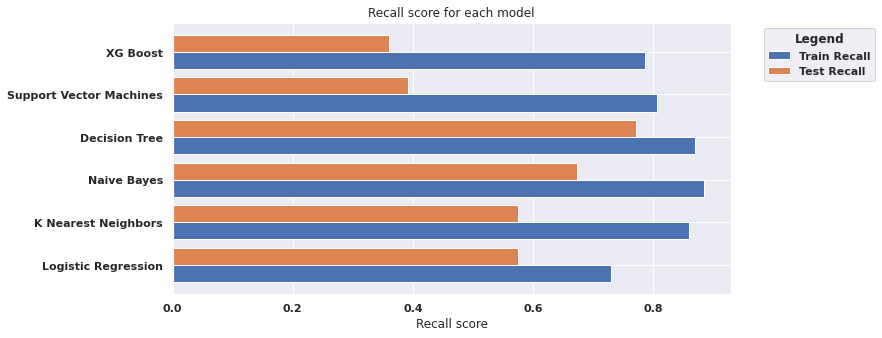

In [ ]:
# Plotting Recall scores

ML_models = ['Logistic Regression','K Nearest Neighbors','Naive Bayes','Decision Tree','Support Vector Machines','XG Boost']
train_recalls = [lr_train_recall,knn_train_recall,nb_train_recall,dt_train_recall,svm_train_recall,xgb_train_recall]
test_recalls = [lr_test_recall,knn_test_recall,nb_test_recall,dt_test_recall,svm_test_recall,xgb_test_recall]
  
X_axis = np.arange(len(ML_models))

plt.figure(figsize=(10,5))
plt.barh(X_axis - 0.2, train_recalls, 0.4, label = 'Train Recall')
plt.barh(X_axis + 0.2, test_recalls, 0.4, label = 'Test Recall')
  
plt.yticks(X_axis,ML_models)
plt.xlabel("Recall score")
plt.title("Recall score for each model")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title='Legend')
plt.show()

The decision tree has the highest train and test recall score compared to other models built.

# **Conclusion**
* We trained 6 Machine Learning models using the training dataset, and hyperparameter tuning was used in some models to improve the model performance.
* To build the models, missing values were handled, feature engineering and feature selection was performed, and the training dataset was oversampled using SMOTE to reduce bias on one outcome.
* Recall was chosen as the model evaluation metric because it was very important that we reduce the false negatives.
* Initial set of predictions were obtained using the baseline model, ie, logistic regression model, and other commonly used classification models were also build in search of better predictions.
* Predicting the risk of coronary heart disease is critical for reducing fatalities caused by this illness. We can avert deaths by taking the required medications and precautions if we can foresee the danger of this sickness ahead of time.
* It is critical that the model we develop has a high recall score. It is OK if the model incorrectly identifies a healthy patient as a high risk patient because it will not result in death, but if a high risk patient is incorrectly labelled as healthy, it may result in fatality.
* We were able to create a model with a recall of just 0.77 because of limitated data available and limited computational power availabe.
* A recall score of 0.77 indicates that out of 100 individuals with the illness, our model will be able to classify only 77 as high risk patients, while the remaining 33 will be misclassified.
* Future developments must include a strategy to improve the model recall score, enabling us to save even more lives from this disease. This includes involving more people in the study, and include people with different medical history, etc build an application with better recall score.
* From our analysis, it is also found that the age of a person was the most important feature in determining the risk of a patient getting infected with CHD, followed by pulse pressure, prevalent hypertension and total cholesterol.
* Diabetes, prevalent stroke and BP medication were the least important features in determining the risk of CHD.